In [1]:
# Import Python Libraries
import sys
import altair as alt
import pandas as pd
import numpy as np
import calendar
# print (pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
alt.data_transformers.disable_max_rows()
%matplotlib inline
import json

In [2]:
!ls

EDA.ipynb      EDA_Taehoon.ipynb  new_msmarco_data
EDA_Roy.ipynb  msmarco		  toy_data


In [3]:
!ls msmarco

all_dev_queries  full_collection	train_queries  triplets
dev_qrel.json	 hard_negatives_scores	TREC_DL_2019   val_retrieval
dev_queries	 splade_triplets	TREC_DL_2020   vienna_triplets


In [4]:
!ls msmarco/full_collection/

raw.tsv


In [5]:
# x = pd.read_csv("msmarco/full_collection/raw.tsv",sep='\t')

In [6]:
# x.head()

In [7]:
# len(x.index)

In [8]:
# Love this! Thanks Allen!

In [9]:
# df_dev_qrel = pd.read_json('msmarco/dev_qrel.json')
# df_dev_qrel.head()

In [10]:
# import json
# f = open('msmarco/dev_qrel.json')
# data = json.load(f)
# data

In [11]:
# df = pd.DataFrame(data)
# df.head()

## 1: Toy Data Analysis

In [12]:
!ls toy_data/

dev_queries  full_collection  qrel  triplets  val_collection  val_queries


### a) dev_queries/raw.tsv

In [13]:
df_td_raw_dq = pd.read_csv("toy_data/dev_queries/raw.tsv",sep='\t')
df_td_raw_dq.head()

,786786,Androgen receptor define
0,1048642,treating tension headaches without medication
1,1048876,what is paranoid sc


In [14]:
df_td_raw_dq.shape[0]
# Gives number of rows
count_row_td_raw_dq = df_td_raw_dq.shape[0] 
# Gives number of columns 
count_col_td_raw_dq = df_td_raw_dq.shape[1]  
print("Number of rows",count_row_td_raw_dq, "Number of columns",count_col_td_raw_dq)

Number of rows 2 Number of columns 2


In [15]:
# df = pd.read_csv('test.csv', header=None)
# df.rename(columns={0: 'name', 1: 'id'}, inplace=True)
# df.to_csv('test_with_col.csv', index=False) # save to new csv file

##### create new raw file raw_with_header with column_names and reference from this point on

In [16]:
df_td_raw_dq = pd.read_csv("toy_data/dev_queries/raw.tsv", header=None,sep='\t')
df_td_raw_dq.head()
df_td_raw_dq.rename(columns={0: 'index', 1: 'document_details'}, inplace=True)
df_td_raw_dq.head()
df_td_raw_dq.to_csv('toy_data/dev_queries/raw_with_header.tsv', index=False) # save to new csv file
df_td_raw_dq_new = pd.read_csv("toy_data/dev_queries/raw_with_header.tsv")
df_td_raw_dq_new.head()

,index,document_details
0,786786,Androgen receptor define
1,1048642,treating tension headaches without medication
2,1048876,what is paranoid sc


<AxesSubplot:>

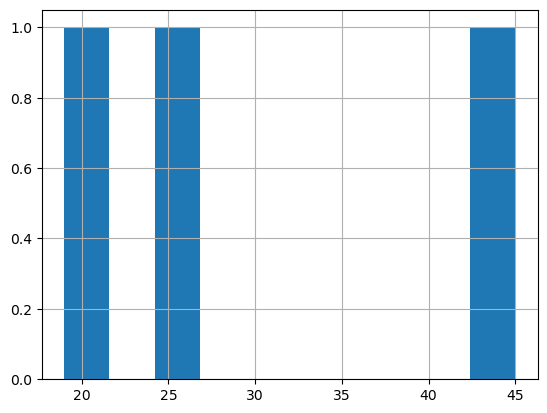

In [17]:
df_td_raw_dq_new["document_details"].str.len().hist(bins=10)

<AxesSubplot:>

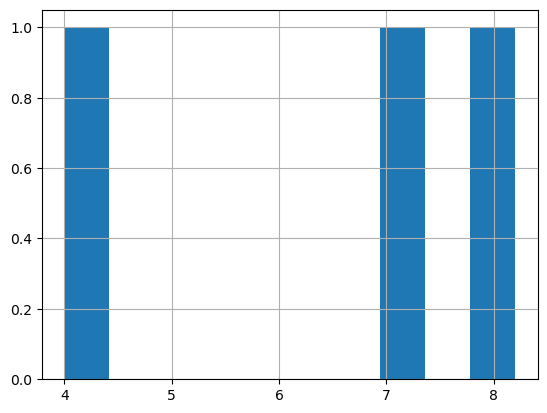

In [18]:
df_td_raw_dq_new["document_details"].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=10)

In [19]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [20]:
corpus=[]
df_td_raw_dq_new1= df_td_raw_dq_new["document_details"].str.split()
df_td_raw_dq_new1=df_td_raw_dq_new1.values.tolist()
corpus=[word for i in df_td_raw_dq_new1 for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [21]:
#### Plot Stop Words

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

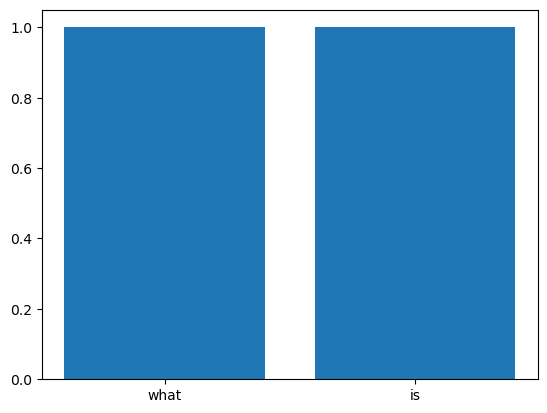

In [23]:
plot_top_stopwords_barchart(df_td_raw_dq_new["document_details"])

In [24]:
#### Plot non Stop words

In [25]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

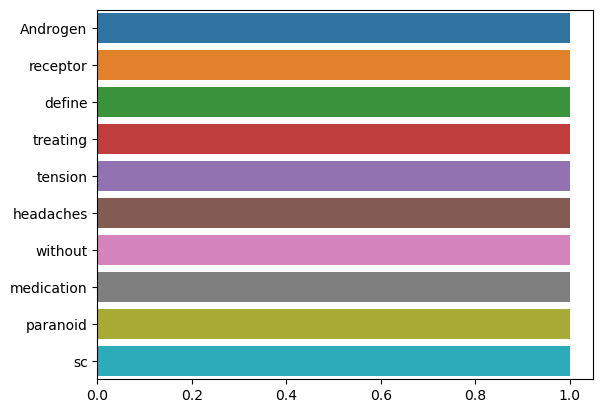

In [26]:
plot_top_non_stopwords_barchart(df_td_raw_dq_new["document_details"])

In [27]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))
# https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools 

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [28]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [29]:
# Code Snippet for Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

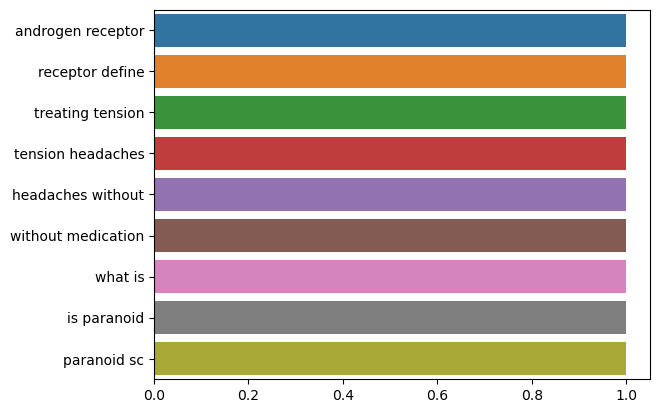

In [30]:
plot_top_ngrams_barchart(df_td_raw_dq_new["document_details"],2)

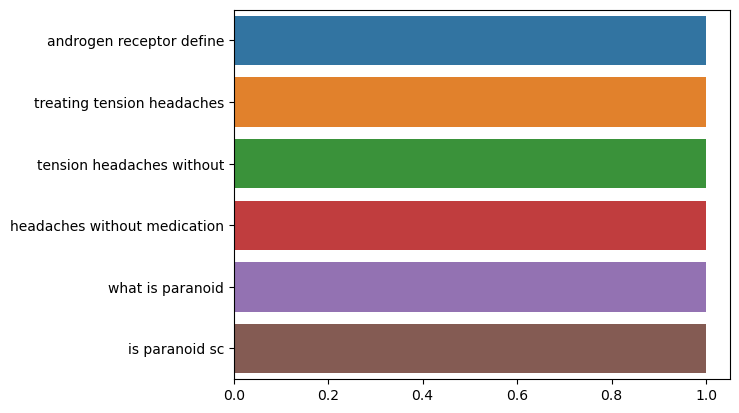

In [31]:
plot_top_ngrams_barchart(df_td_raw_dq_new["document_details"],3)

<AxesSubplot:>

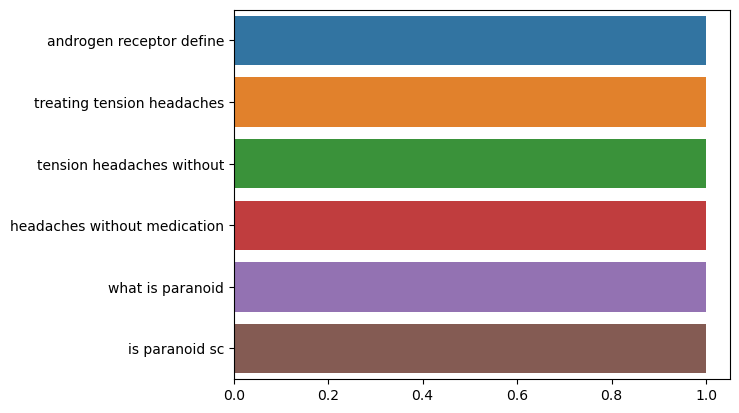

In [32]:
top_tri_grams=get_top_ngram(df_td_raw_dq_new["document_details"],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

###### I need help with this
### installed pyLDAvis, gensim but it still does not run
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Code Snippet for Creating LDA visualization

import numpy as np
import nltk
from nltk.corpus import stopwords
# import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for df_td_raw_dq_new in document_details:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  pyLDAvis.gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [33]:
# https://app.neptune.ai/neptune-ai/eda-nlp-tools/n/4-0-wordclouds-853dfded-4d17-4f37-83e4-15ec53f74e60/5833b046-3cf9-4c0f-8fbf-4a5933da924e

In [34]:
# Come back to this later
# https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/ 
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(analyzer='word')
# data=cv.fit_transform(df_td_raw_dq['lemmatized'])
# df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
# df_dtm.index=df_grouped.index
# df_dtm.head(3)

In [35]:
# Come back to this later
# from wordcloud import WordCloud
# from textwrap import wrap

# Function for generating word clouds
# def generate_wordcloud(data,title):
#     wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
#     plt.figure(figsize=(10,8))
#     plt.imshow(wc, interpolation='bilinear')
#    plt.axis("off")
#    plt.title('\n'.join(wrap(title,60)),fontsize=13)
#    plt.show()

In [36]:
# Come back to this later
# Transposing document term matrix
# df_td_raw_dq_new=df_td_raw_dq_new.transpose()

In [37]:
# Plotting word cloud for each document_details
# for index,document_details in enumerate(df_td_raw_dq_new.columns):
#    generate_wordcloud(df_td_raw_dq_new[document_details].sort_values(ascending=False),document_details)

### b) full_collection/raw.tsv

In [38]:
df_td_raw_fc = pd.read_csv("toy_data/full_collection/raw.tsv",sep='\t')
df_td_raw_fc.head()

,0,The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.
0,1,The Manhattan Project and its atomic bomb help...
1,2,Essay on The Manhattan Project - The Manhattan...
2,3,The Manhattan Project was the name for a proje...
3,4,versions of each volume as well as complementa...
4,5,The Manhattan Project. This once classified ph...


In [39]:
df_td_raw_fc.shape[0]
# Gives number of rows
count_row_td_raw_fc = df_td_raw_fc.shape[0] 
# Gives number of columns 
count_col_td_raw_fc = df_td_raw_fc.shape[1]  
print("Number of rows",count_row_td_raw_fc, "Number of columns",count_col_td_raw_fc)

Number of rows 88 Number of columns 2


### c) triplets/raw.tsv

In [40]:
df_td_raw_triplets = pd.read_csv("toy_data/triplets/raw.tsv",sep='\t')
df_td_raw_triplets.head()

,is a little caffeine ok during pregnancy,"We donât know a lot about the effects of caffeine during pregnancy on you and your baby. So itâs best to limit the amount you get each day. If youâre pregnant, limit caffeine to 200 milligrams each day. This is about the amount in 1Â½ 8-ounce cups of coffee or one 12-ounce cup of coffee.","It is generally safe for pregnant women to eat chocolate because studies have shown to prove certain benefits of eating chocolate during pregnancy. However, pregnant women should ensure their caffeine intake is below 200 mg per day."
0,what fruit is native to australia,Passiflora herbertiana. A rare passion fruit n...,"The kola nut is the fruit of the kola tree, a ..."
1,how large is the canadian military,The Canadian Armed Forces. 1 The first large-...,The Canadian Physician Health Institute (CPHI)...
2,types of fruit trees,Cherry. Cherry trees are found throughout the ...,"The kola nut is the fruit of the kola tree, a ..."
3,how many calories a day are lost breastfeeding,"Not only is breastfeeding better for the baby,...","However, you still need some niacin each day; ..."
4,where is harrison city pa,Harrison City is a census-designated place (CD...,"Nearest cities: Vandling borough, PA (1.1 mile..."


In [41]:
df_td_raw_triplets.shape[0]
# Gives number of rows
count_row_td_raw_triplets = df_td_raw_triplets.shape[0] 
# Gives number of columns 
count_col_td_raw_triplets = df_td_raw_triplets.shape[1]  
print("Number of rows",count_row_td_raw_triplets, "Number of columns",count_col_td_raw_triplets)

Number of rows 99 Number of columns 3


### d) val_collection/raw.tsv

In [42]:
df_td_raw_vc = pd.read_csv("toy_data/val_collection/raw.tsv",sep='\t')
df_td_raw_vc.head()

,0,The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.
0,69,"However, a major motive with people today want..."
1,45,About us. Medical Tours Costa Rica has helped ...
2,12,Tutorial: Introduction to Restorative Justice....
3,34,"The rise of industrial America, the dominance ..."
4,38,This finally resulted in legislation that aime...


In [43]:
df_td_raw_vc.shape[0]
# Gives number of rows
count_row_td_raw_vc = df_td_raw_vc.shape[0] 
# Gives number of columns 
count_col_td_raw_vc = df_td_raw_vc.shape[1]  
print("Number of rows",count_row_td_raw_vc, "Number of columns",count_col_td_raw_vc)

Number of rows 19 Number of columns 2


### e) val_queries/raw.tsv

In [44]:
df_td_raw_vq = pd.read_csv("toy_data/val_queries/raw.tsv",sep='\t')
df_td_raw_vq.head()

,786786,Androgen receptor define
0,1048642,treating tension headaches without medication
1,1048876,what is paranoid sc


In [45]:
df_td_raw_vq.shape[0]
# Gives number of rows
count_row_td_raw_vq = df_td_raw_vq.shape[0] 
# Gives number of columns 
count_col_td_raw_vq = df_td_raw_vq.shape[1]  
print("Number of rows",count_row_td_raw_vq, "Number of columns",count_col_td_raw_vq)

Number of rows 2 Number of columns 2


## 2: MSMARCO Analysis

### a) all_dev_queries

In [46]:
df_mm_raw_adq = pd.read_csv("msmarco/all_dev_queries/raw.tsv",sep='\t')
df_mm_raw_adq.head()

,1048578,cost of endless pools/swim spa
0,1048579,what is pcnt
1,1048580,what is pcb waste
2,1048581,what is pbis?
3,1048582,what is paysky
4,1048583,what is paydata


In [47]:
df_mm_raw_adq.shape[0]
# Gives number of rows
count_row_mm_raw_adq = df_mm_raw_adq.shape[0] 
# Gives number of columns 
count_col_mm_raw_adq = df_mm_raw_adq.shape[1]  
print("Number of rows",count_row_mm_raw_adq, "Number of columns",count_col_mm_raw_adq)

Number of rows 101092 Number of columns 2


In [48]:
df_mm_raw_adq.dropna(inplace=True)
df_mm_raw_adq.isnull().sum()

1048578                           0
cost of endless pools/swim spa    0
dtype: int64

##### create new raw file raw_with_header with column_names and reference from this point on

In [49]:
df_mm_raw_adq = pd.read_csv("msmarco/all_dev_queries/raw.tsv", header=None,sep='\t')
df_mm_raw_adq.head()
df_mm_raw_adq.rename(columns={0: 'index', 1: 'document_details'}, inplace=True)
df_mm_raw_adq.head()
df_mm_raw_adq.to_csv("/home/ec2-user/project/splade/data/new_msmarco_data/all_dev_queries/raw_with_header.tsv", index=False) # save to new csv file
df_mm_raw_adq_new = pd.read_csv("/home/ec2-user/project/splade/data/new_msmarco_data/all_dev_queries/raw_with_header.tsv")
df_mm_raw_adq_new.head()

,index,document_details
0,1048578,cost of endless pools/swim spa
1,1048579,what is pcnt
2,1048580,what is pcb waste
3,1048581,what is pbis?
4,1048582,what is paysky


In [50]:
df_mm_raw_adq_new.shape[0]
# Gives number of rows
count_row_mm_raw_adq_new = df_mm_raw_adq_new.shape[0] 
# Gives number of columns 
count_col_mm_raw_adq_new = df_mm_raw_adq_new.shape[1]  
print("Number of rows",count_row_mm_raw_adq_new, "Number of columns",count_col_mm_raw_adq_new)

Number of rows 101093 Number of columns 2


#### Analyzing text statistics

<AxesSubplot:>

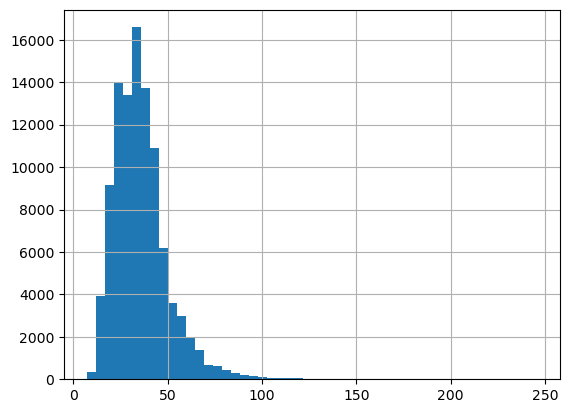

In [51]:
# news['headline_text'].str.len().hist()
# word frequency analysis
df_mm_raw_adq_new["document_details"].str.len().hist(bins=50)

<AxesSubplot:>

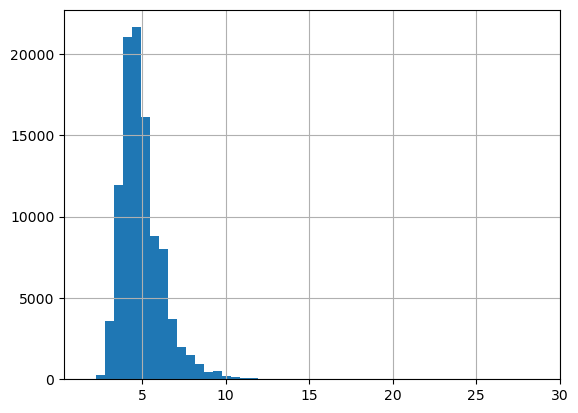

In [52]:
# Now, we will move on to data exploration at a word-level. 
# Let’s plot the number of words appearing in each document detail.

df_mm_raw_adq_new["document_details"].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=50)

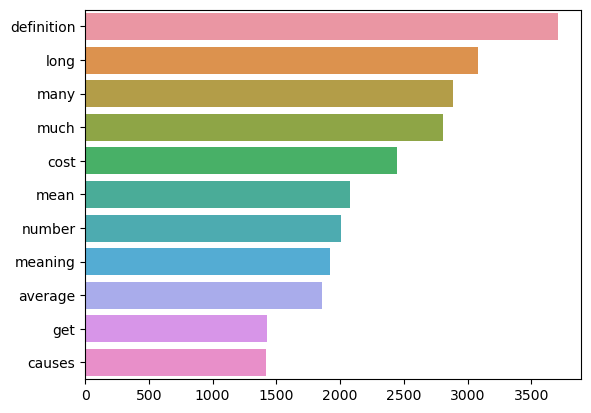

In [53]:
plot_top_non_stopwords_barchart(df_mm_raw_adq_new["document_details"])

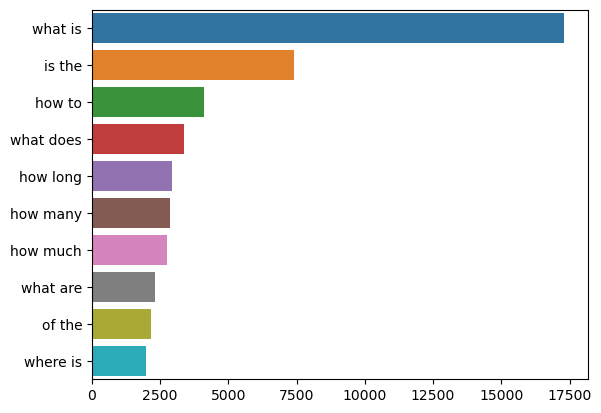

In [54]:
plot_top_ngrams_barchart(df_mm_raw_adq_new["document_details"],2)

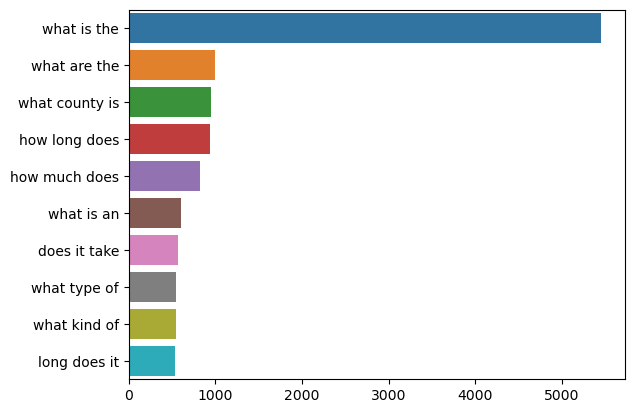

In [55]:
plot_top_ngrams_barchart(df_mm_raw_adq_new["document_details"],3)

<AxesSubplot:>

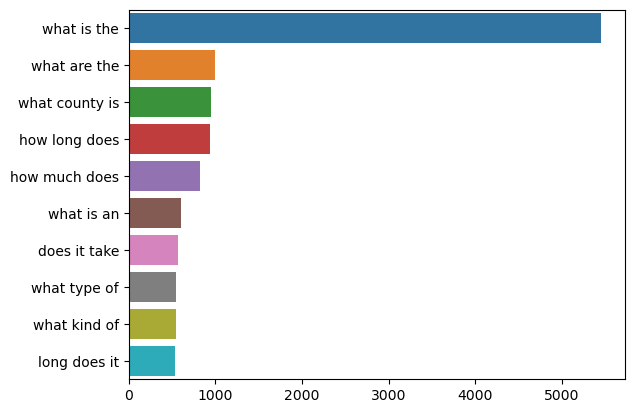

In [56]:
top_tri_grams=get_top_ngram(df_mm_raw_adq_new["document_details"],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

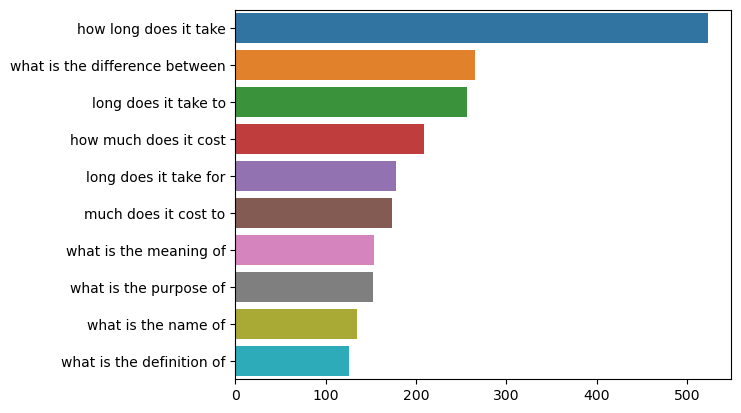

In [57]:
top_tri_grams=get_top_ngram(df_mm_raw_adq_new["document_details"],n=5)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

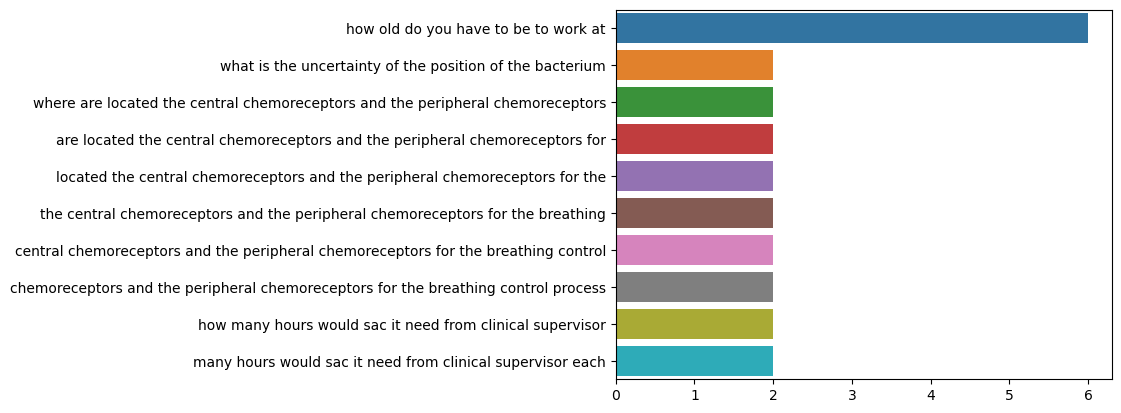

In [58]:
top_tri_grams=get_top_ngram(df_mm_raw_adq_new["document_details"],n=10)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### b) dev_queries

In [59]:
df_mm_raw_dq = pd.read_csv("msmarco/dev_queries/raw.tsv",sep='\t')
df_mm_raw_dq.head()

,1048585,what is paula deen's brother
0,2,Androgen receptor define
1,524332,treating tension headaches without medication
2,1048642,what is paranoid sc
3,524447,treatment of varicose veins in legs
4,786674,what is prime rate in canada


In [60]:
df_mm_raw_dq.shape[0]
# Gives number of rows
count_row_mm_raw_dq = df_mm_raw_dq.shape[0] 
# Gives number of columns 
count_col_mm_raw_dq = df_mm_raw_dq.shape[1]  
print("Number of rows",count_row_mm_raw_dq, "Number of columns",count_col_mm_raw_dq)

Number of rows 6979 Number of columns 2


In [61]:
df_mm_raw_dq.dropna(inplace=True)
df_mm_raw_dq.isnull().sum()

1048585                         0
what is paula deen's brother    0
dtype: int64

##### create new raw file raw_with_header with column_names and reference from this point on

In [62]:
df_mm_raw_dq = pd.read_csv("msmarco/dev_queries/raw.tsv", header=None,sep='\t')
df_mm_raw_dq.head()
df_mm_raw_dq.rename(columns={0: 'index', 1: 'document_details'}, inplace=True)
df_mm_raw_dq.head()
df_mm_raw_dq.to_csv("/home/ec2-user/project/splade/data/new_msmarco_data/dev_queries/raw_with_header.tsv", index=False) # save to new csv file
df_mm_raw_dq_new = pd.read_csv("/home/ec2-user/project/splade/data/new_msmarco_data/dev_queries/raw_with_header.tsv")
df_mm_raw_dq_new.head()

,index,document_details
0,1048585,what is paula deen's brother
1,2,Androgen receptor define
2,524332,treating tension headaches without medication
3,1048642,what is paranoid sc
4,524447,treatment of varicose veins in legs


In [63]:
df_mm_raw_dq_new.shape[0]
# Gives number of rows
count_row_mm_raw_dq_new = df_mm_raw_dq_new.shape[0] 
# Gives number of columns 
count_col_mm_raw_dq_new = df_mm_raw_dq_new.shape[1]  
print("Number of rows",count_row_mm_raw_dq_new, "Number of columns",count_col_mm_raw_dq_new)

Number of rows 6980 Number of columns 2


<AxesSubplot:>

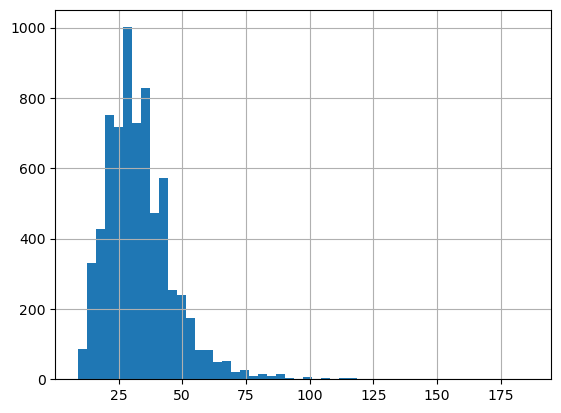

In [64]:
# news['headline_text'].str.len().hist()
# word frequency analysis
df_mm_raw_dq_new["document_details"].str.len().hist(bins=50)

<AxesSubplot:>

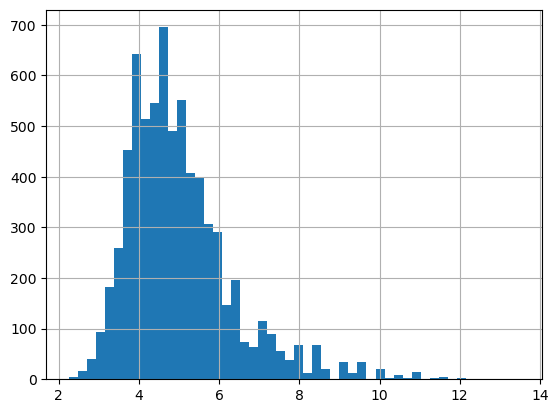

In [65]:
# Now, we will move on to data exploration at a word-level. 
# Let’s plot the number of words appearing in each document detail.

df_mm_raw_dq_new["document_details"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=50)

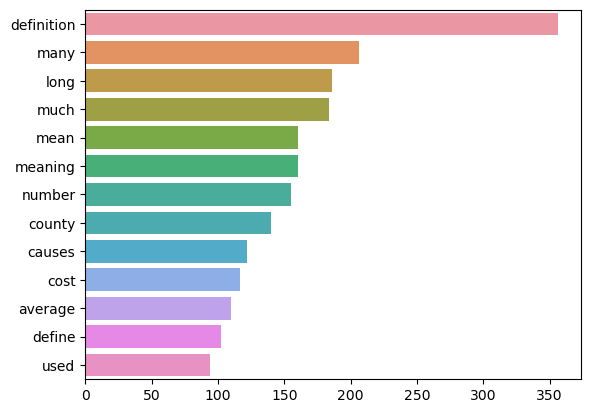

In [66]:
plot_top_non_stopwords_barchart(df_mm_raw_dq_new["document_details"])

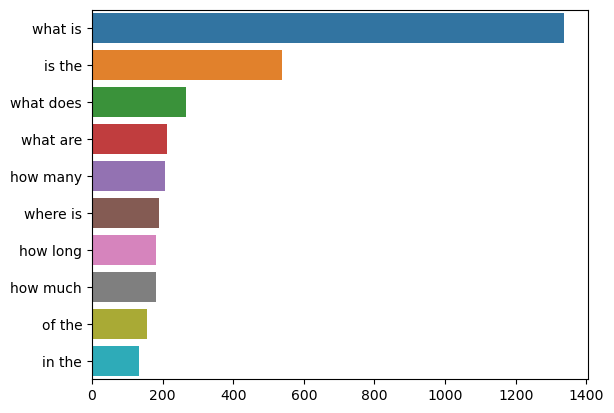

In [67]:
plot_top_ngrams_barchart(df_mm_raw_dq_new["document_details"],2)

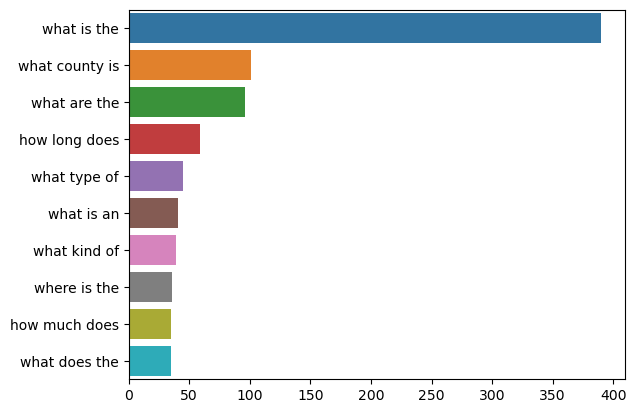

In [68]:
plot_top_ngrams_barchart(df_mm_raw_dq_new["document_details"],3)

<AxesSubplot:>

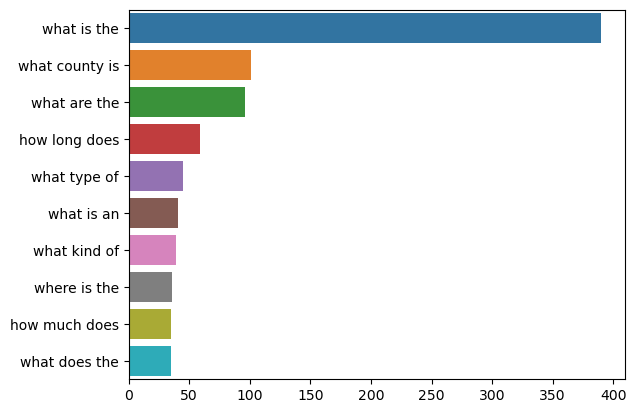

In [69]:
top_tri_grams=get_top_ngram(df_mm_raw_dq_new["document_details"],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

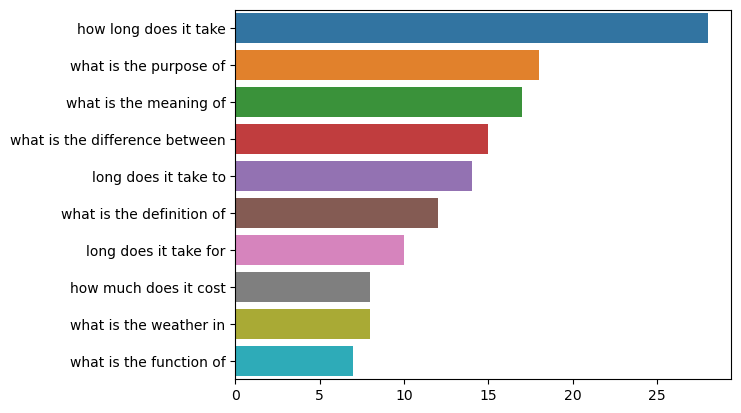

In [70]:
top_tri_grams=get_top_ngram(df_mm_raw_dq_new["document_details"],n=5)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

<AxesSubplot:>

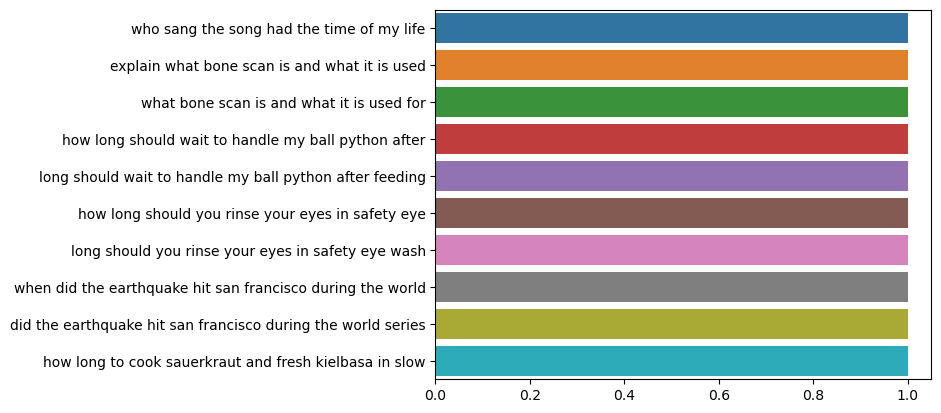

In [71]:
top_tri_grams=get_top_ngram(df_mm_raw_dq_new["document_details"],n=10)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### c) full_collection

#####  Include this at this time to assist with memory economy
##### create new raw file raw_with_header with column_names and reference from this point on

In [ ]:
df_mm_raw_fc = pd.read_csv("msmarco/full_collection/raw.tsv", header=None,sep='\t')
# df_mm_raw_fc.head()
# df_mm_raw_fc = pd.read_csv("msmarco/full_collection/raw.tsv", header=None, sep='\t')
# df_mm_raw_fc.head()
df_mm_raw_fc.rename(columns={0: 'index', 1: 'document_details'}, inplace=True)
df_mm_raw_fc.head()
df_mm_raw_fc.to_csv("/home/ec2-user/project/splade/data/new_msmarco_data/full_collection/raw_with_header.tsv", index=False) 
# save to new csv file
df_mm_raw_fc_new = pd.read_csv("/home/ec2-user/project/splade/data/new_msmarco_data/full_collection/raw_with_header.tsv")
df_mm_raw_fc_new = df_mm_raw_fc_new.sample(n=1500000)
df_mm_raw_fc_new.head()

In [ ]:
df_mm_raw_fc.shape[0]
# Gives number of rows
count_row_mm_raw_fc = df_mm_raw_fc.shape[0] 
# Gives number of columns 
count_col_mm_raw_fc = df_mm_raw_fc.shape[1]  
print("Number of rows",count_row_mm_raw_fc, "Number of columns",count_col_mm_raw_fc)

In [ ]:
df_mm_raw_fc.dropna(inplace=True)
df_mm_raw_fc.isnull().sum()

##### create new raw file raw_with_header with column_names and reference from this point on

In [ ]:
# df_mm_raw_fc = pd.read_csv("msmarco/full_collection/raw.tsv", header=None,sep='\t')
# df_mm_raw_fc.head()
# df_mm_raw_fc.rename(columns={0: 'index', 1: 'document_details'}, inplace=True)
# df_mm_raw_fc.head()
# df_mm_raw_fc.to_csv("/home/ec2-user/project/splade/data/new_msmarco_data/full_collection/raw_with_header.tsv", index=False) # save to new csv file
# df_mm_raw_fc_new = pd.read_csv("/home/ec2-user/project/splade/data/new_msmarco_data/full_collection/raw_with_header.tsv")
# df_mm_raw_fc_new.head()

In [ ]:
df_mm_raw_fc_new.shape[0]
# Gives number of rows
count_row_mm_raw_fc_new = df_mm_raw_fc_new.shape[0] 
# Gives number of columns 
count_col_mm_raw_fc_new = df_mm_raw_fc_new.shape[1]  
print("Number of rows",count_row_mm_raw_fc_new, "Number of columns",count_col_mm_raw_fc_new)
# Orig 8841823

In [ ]:
# word frequency analysis
df_mm_raw_fc_new["document_details"].str.len().hist(bins=50)

In [ ]:
# Now, we will move on to data exploration at a word-level. 
# Let’s plot the number of words appearing in each document detail.
# df_mm_raw_fc_new["document_details"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [ ]:
plot_top_non_stopwords_barchart(df_mm_raw_fc_new["document_details"])

In [ ]:
#plot_top_ngrams_barchart(df_mm_raw_fc_new["document_details"],2)

In [ ]:
# plot_top_ngrams_barchart(df_mm_raw_fc_new["document_details"],3)

In [ ]:
# top_tri_grams=get_top_ngram(df_mm_raw_fc_new["document_details"],n=3)
# x,y=map(list,zip(*top_tri_grams))
# sns.barplot(x=y,y=x)

### d) train_queries/queries

In [ ]:
df_mm_raw_tq = pd.read_csv("msmarco/train_queries/queries/raw.tsv",sep='\t')
df_mm_raw_tq.head()

In [ ]:
df_mm_raw_tq.shape[0]
# Gives number of rows
count_row_mm_raw_tq = df_mm_raw_tq.shape[0] 
# Gives number of columns 
count_col_mm_raw_tq = df_mm_raw_tq.shape[1]  
print("Number of rows",count_row_mm_raw_tq, "Number of columns",count_col_mm_raw_tq)

In [ ]:
df_mm_raw_tq.dropna(inplace=True)
df_mm_raw_tq.isnull().sum()

### e) val_retrieval/collection

In [ ]:
df_mm_raw_vrc = pd.read_csv("msmarco/val_retrieval/collection/raw.tsv",sep='\t')
df_mm_raw_vrc.head()

In [ ]:
df_mm_raw_vrc.shape[0]
# Gives number of rows
count_row_mm_raw_vrc = df_mm_raw_vrc.shape[0] 
# Gives number of columns 
count_col_mm_raw_vrc = df_mm_raw_vrc.shape[1]  
print("Number of rows",count_row_mm_raw_vrc, "Number of columns",count_col_mm_raw_vrc)

In [ ]:
df_mm_raw_vrc.dropna(inplace=True)
df_mm_raw_vrc.isnull().sum()

### f) val_retrieval/queries

In [ ]:
df_mm_raw_vrq = pd.read_csv("msmarco/val_retrieval/queries/raw.tsv",sep='\t')
df_mm_raw_vrq.head()

In [ ]:
df_mm_raw_vrq.shape[0]
# Gives number of rows
count_row_mm_raw_vrq = df_mm_raw_vrq.shape[0] 
# Gives number of columns 
count_col_mm_raw_vrq = df_mm_raw_vrq.shape[1]  
print("Number of rows",count_row_mm_raw_vrq, "Number of columns",count_col_mm_raw_vrq)

In [ ]:
df_mm_raw_vrq.dropna(inplace=True)
df_mm_raw_vrq.isnull().sum()